# DBSCAN Assignment

In [3]:
# Maths
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# ML
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

# SQL
from sqlalchemy import create_engine

# Ignore Warn
import warnings
warnings.filterwarnings('ignore')

In [83]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [84]:
# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [85]:
# Standardizing
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2).fit_transform(X_std)


###   1. Apply DBSCAN to the heart disease data by trying different values for eps and min_samples parameters. You'll realize that it's really hard to get a two cluster solution using DBSCAN if not impossible.

In [106]:
# Defining the agglomerative clustering
dbscan = DBSCAN(eps=1, min_samples=1, metric='euclidean')

# Fit model
clusters = dbscan.fit_predict(X_std)

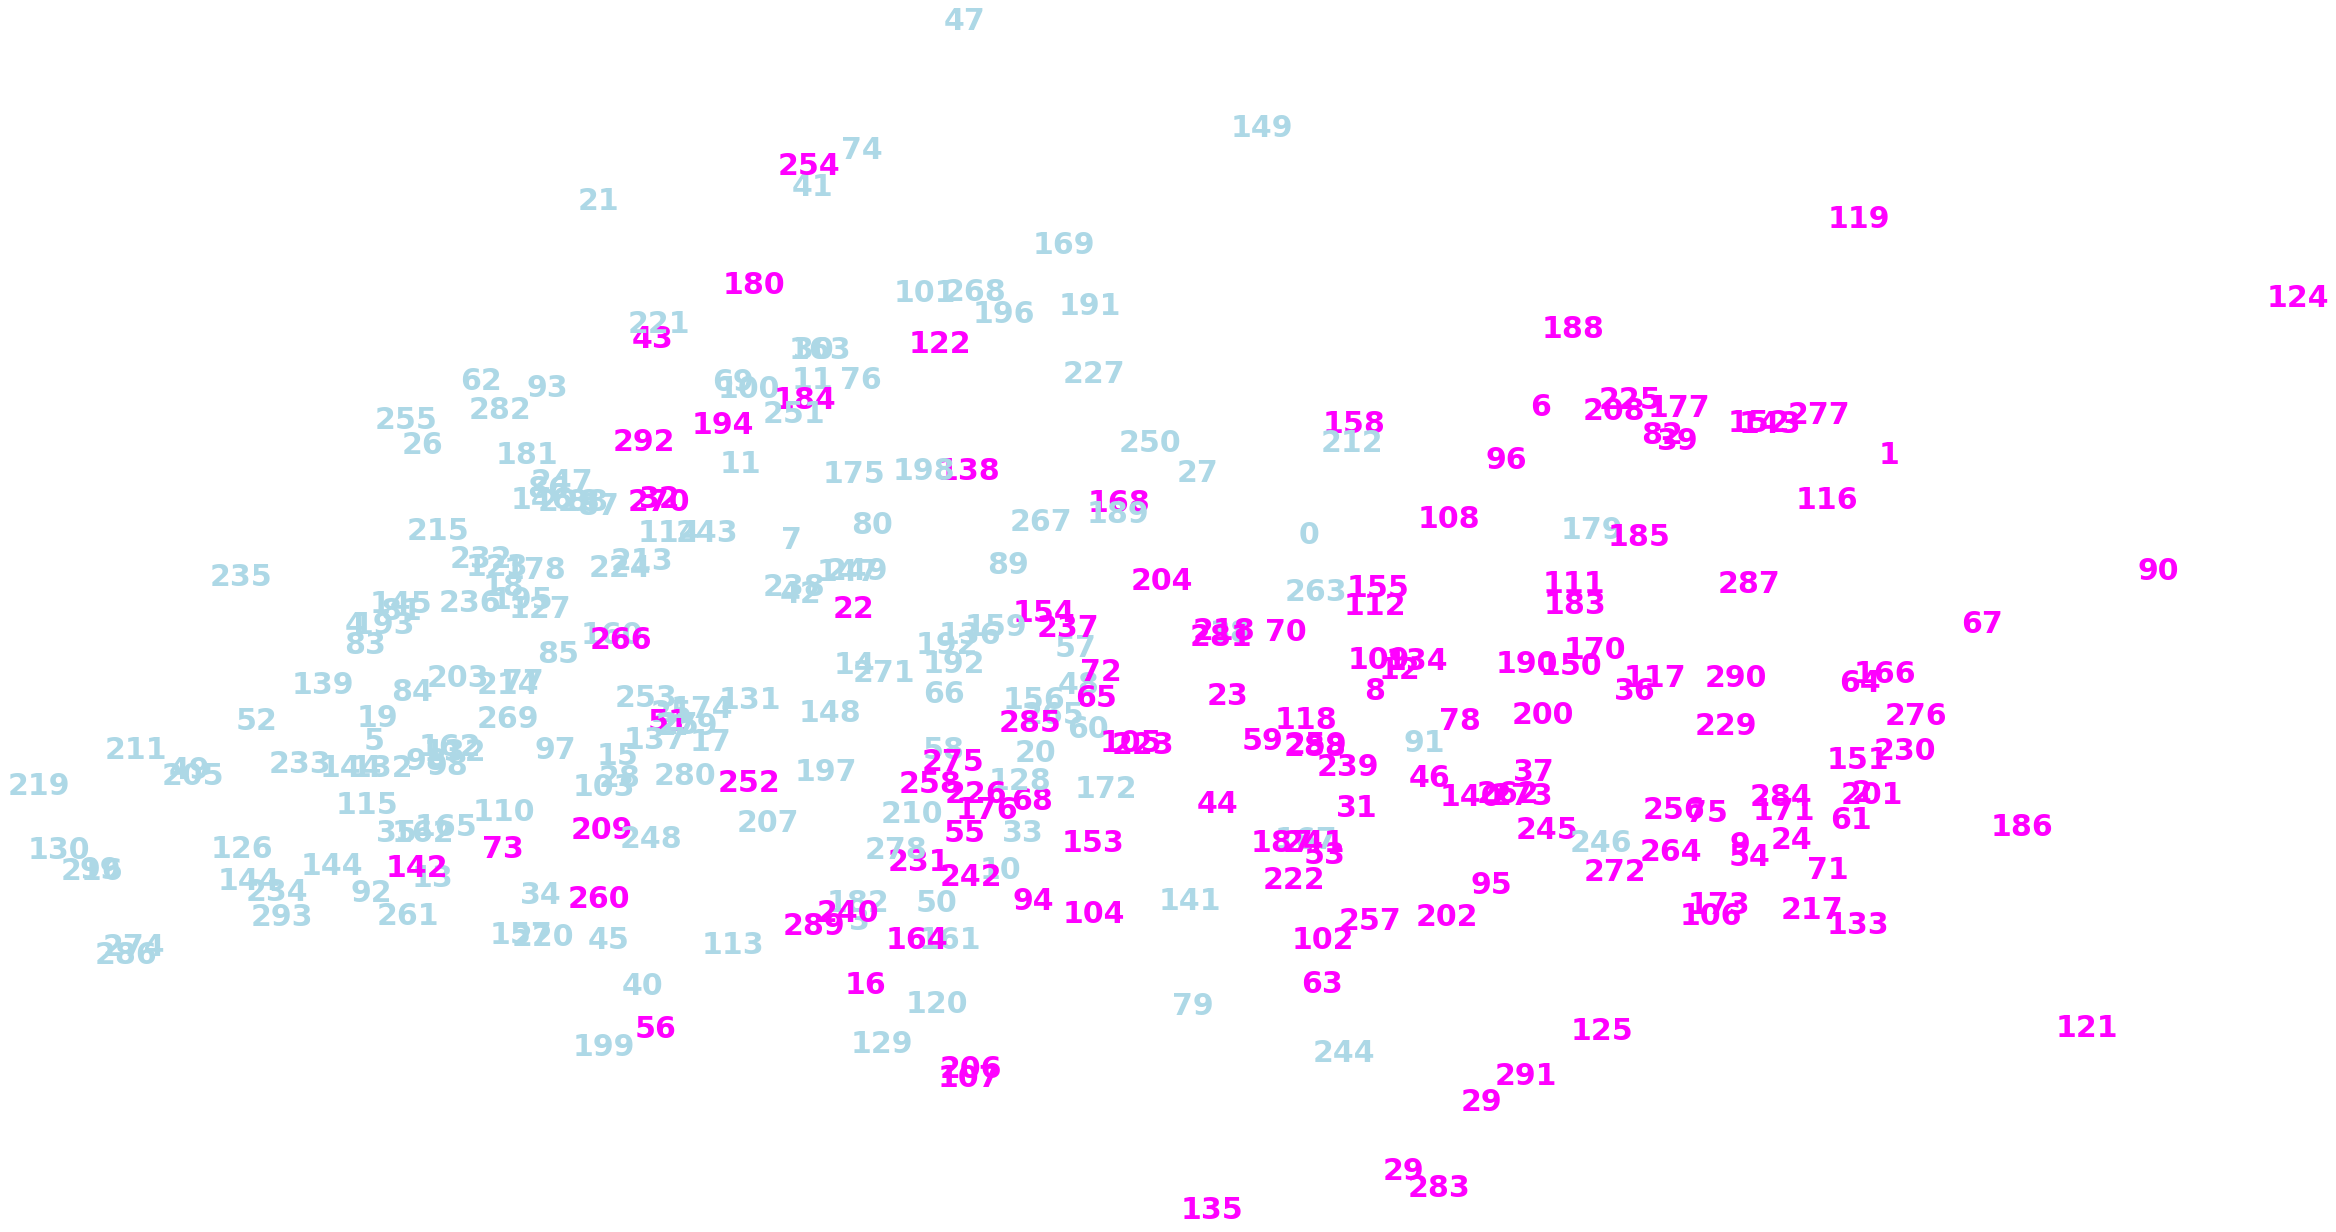

In [107]:
# Plotting
plt.figure(figsize=(5,3))
colors = ('magenta', 'lightblue')

for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 30}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()
            

###  2. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of min_samples. What's the effect of increasing min_samples on the number of clusters DBSCAN identifies?

min_samples: 2


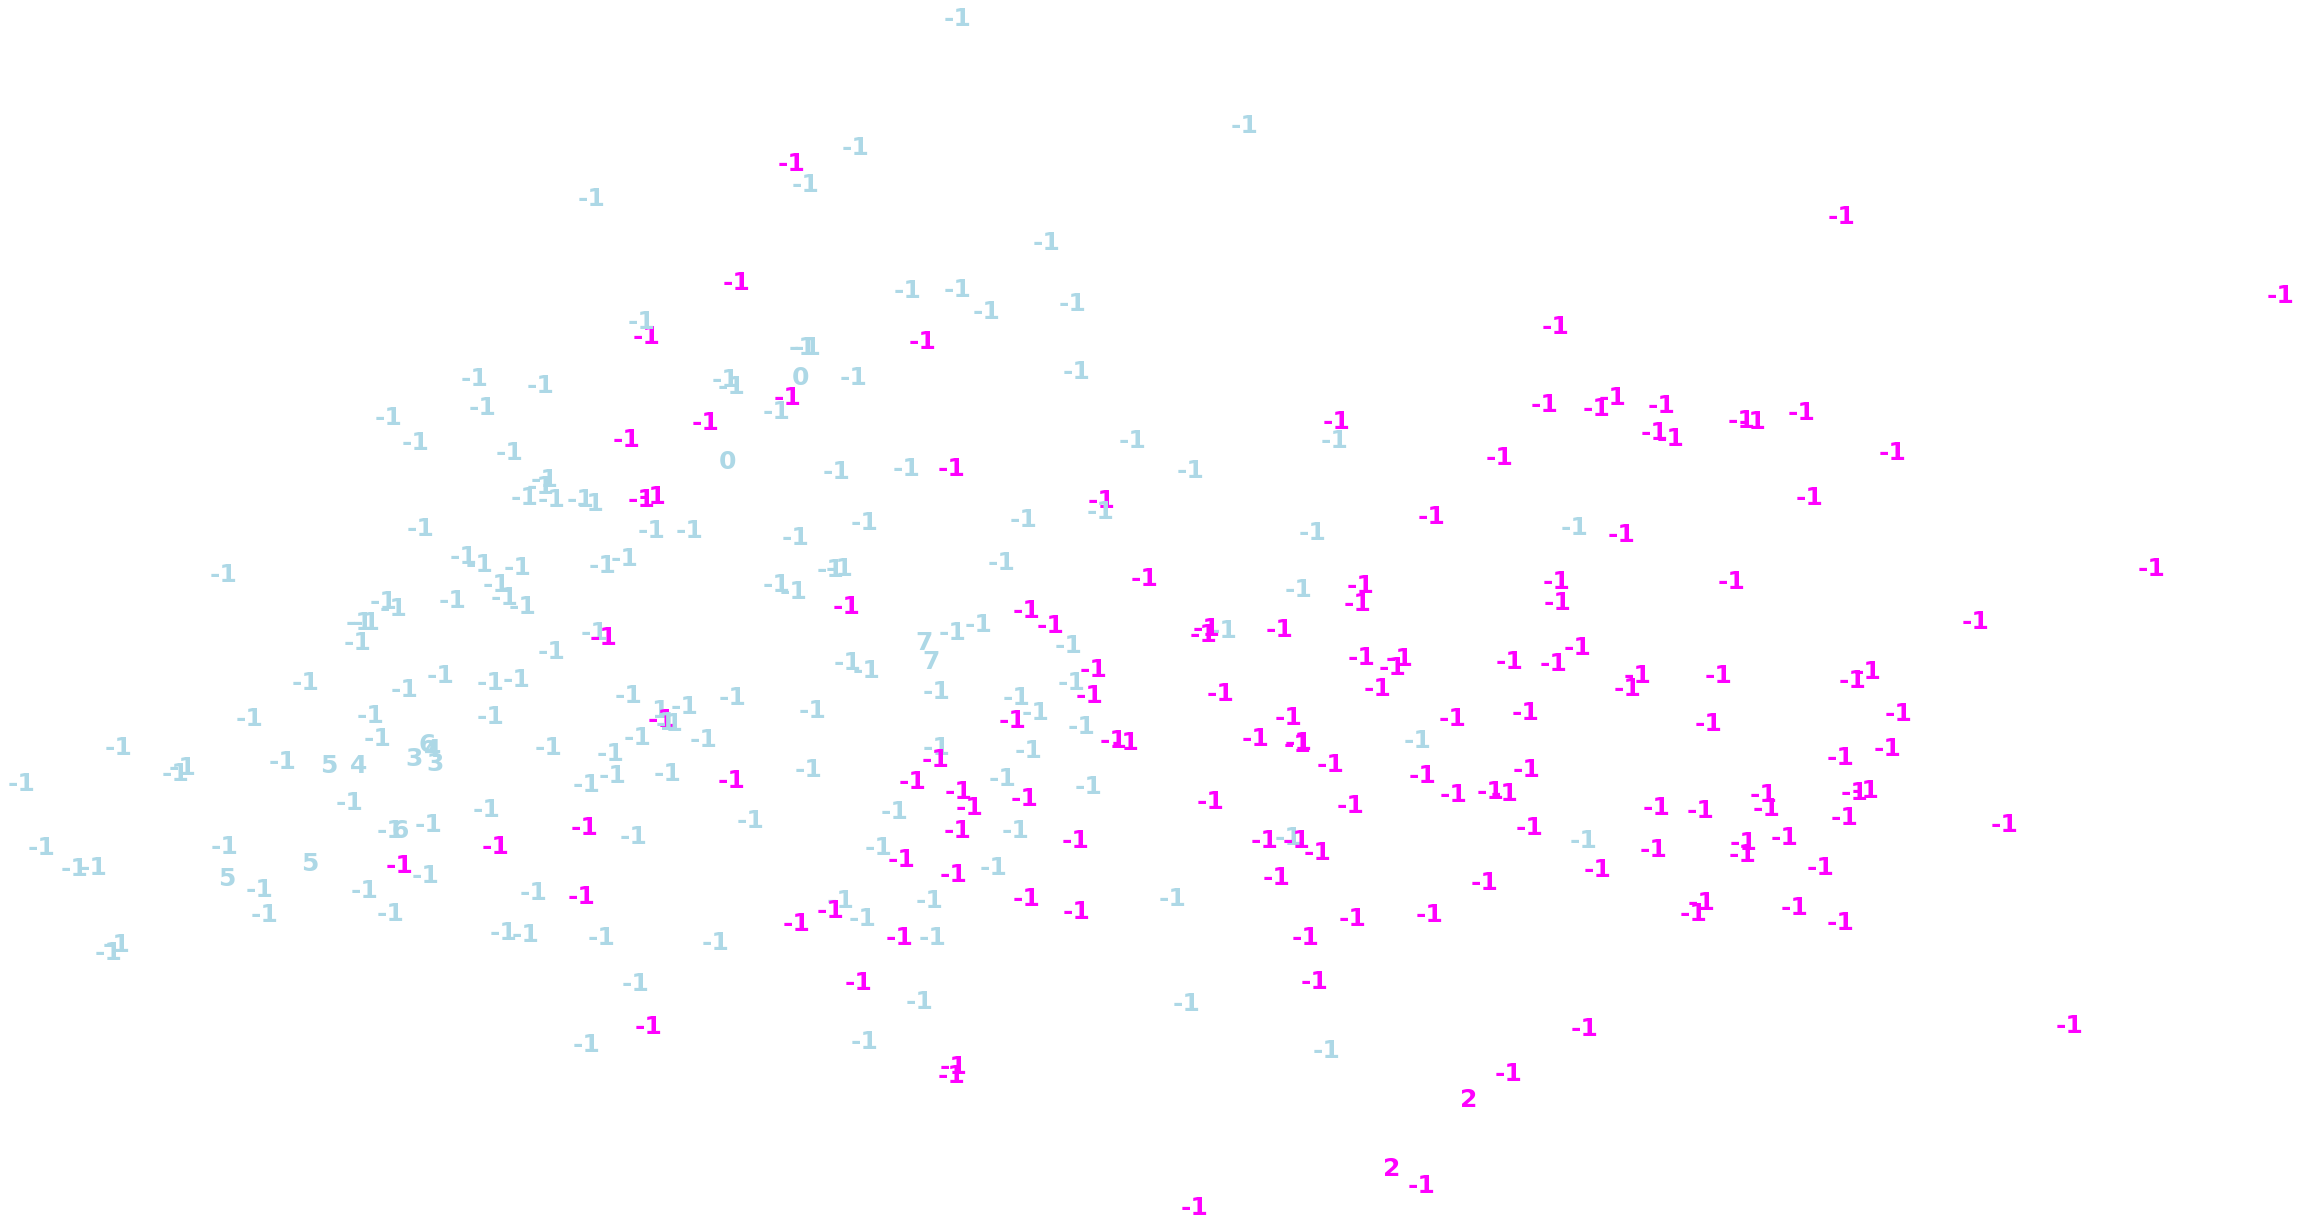



min_samples: 3


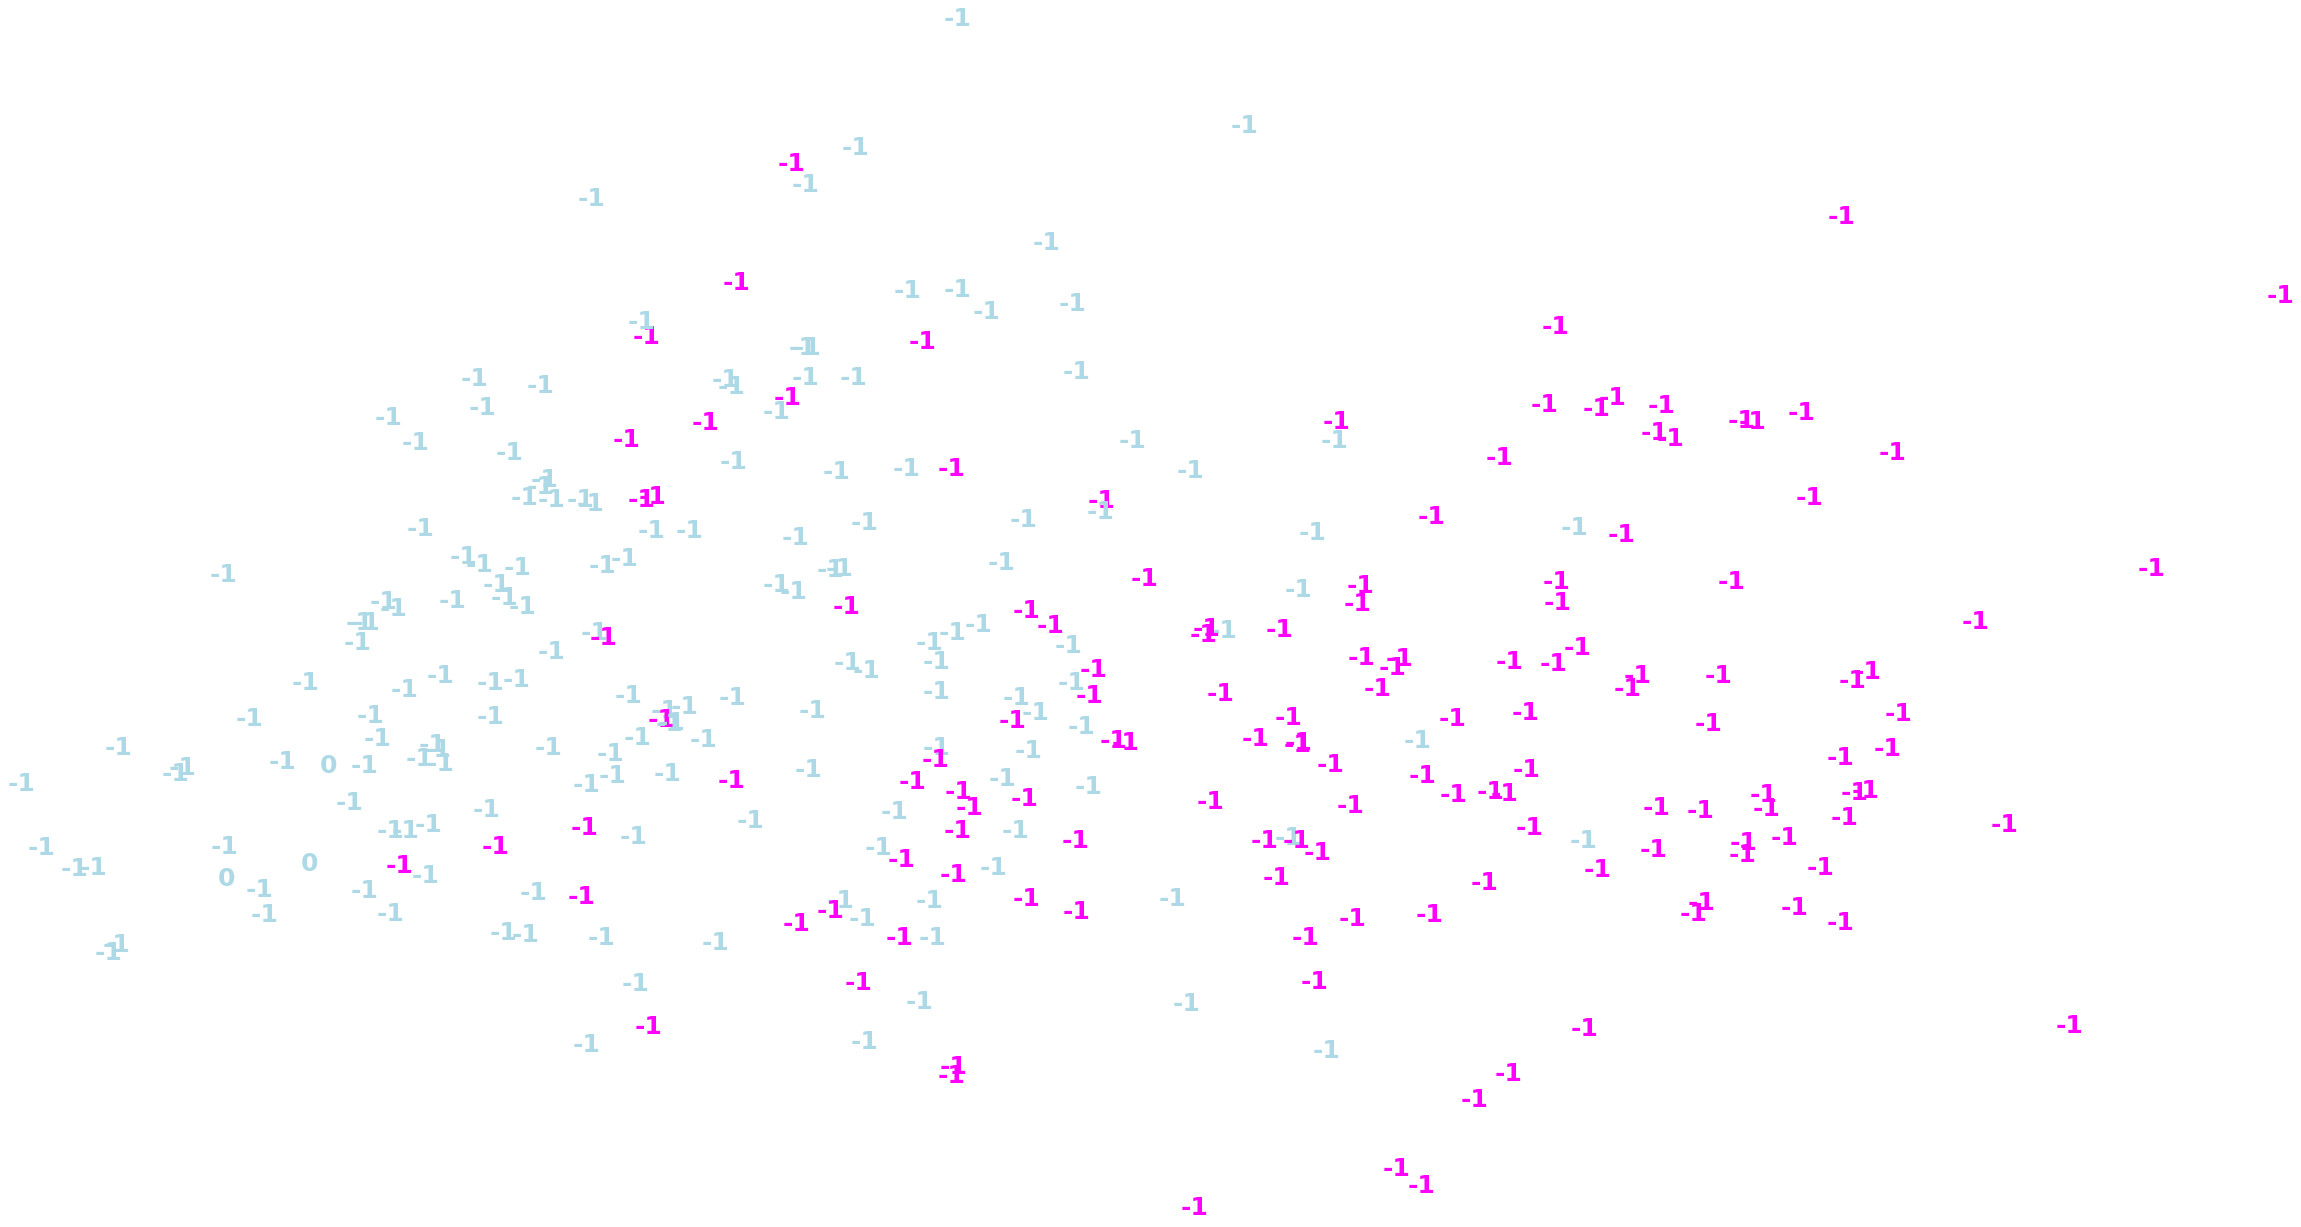



min_samples: 4


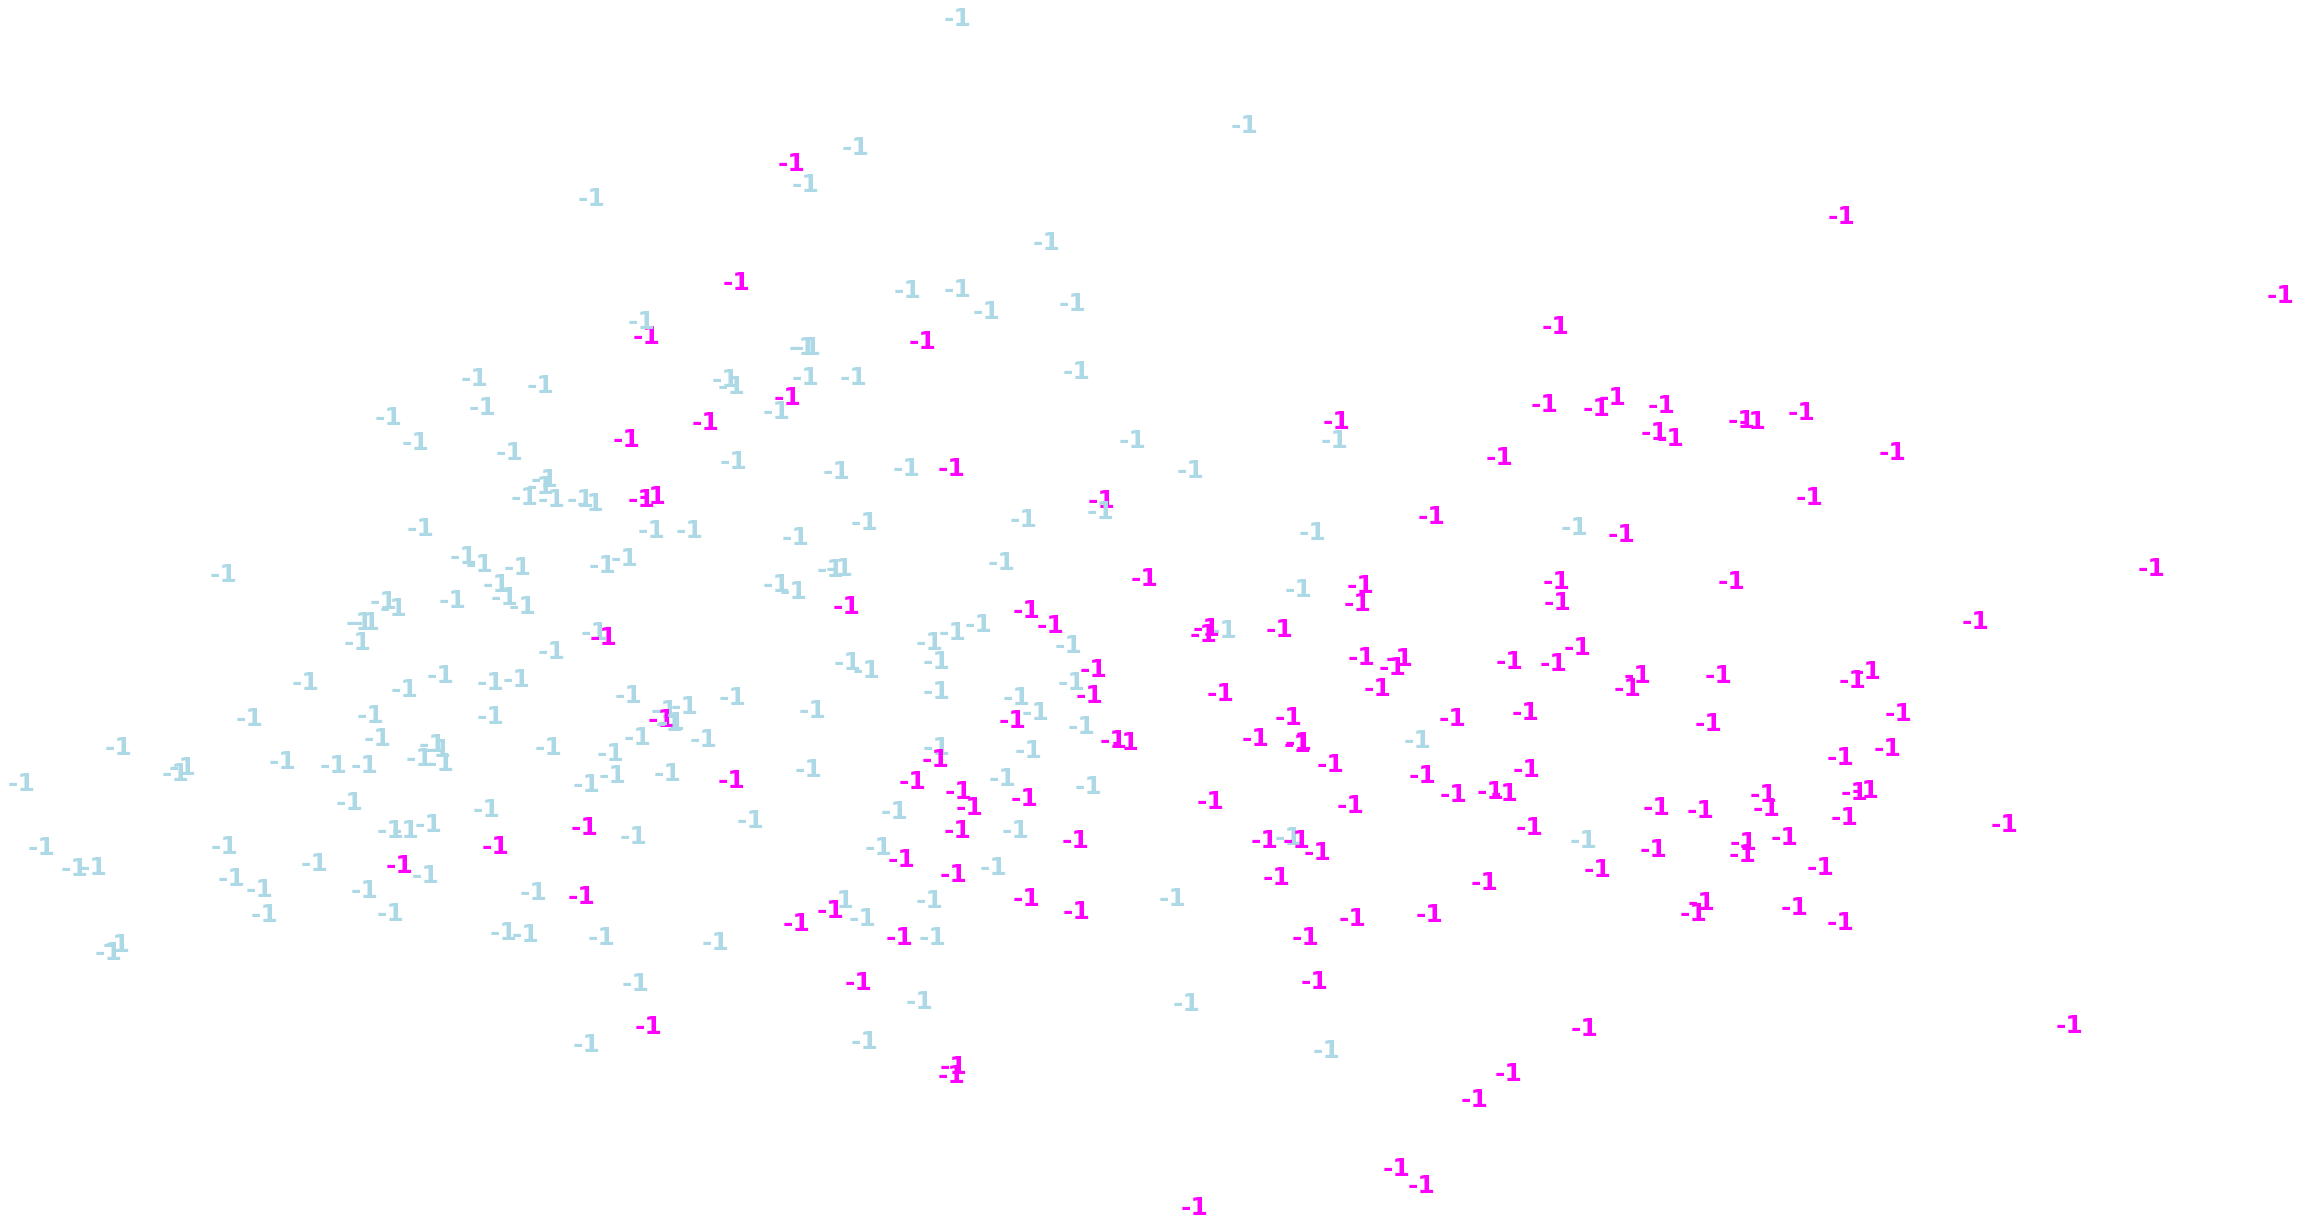



min_samples: 5


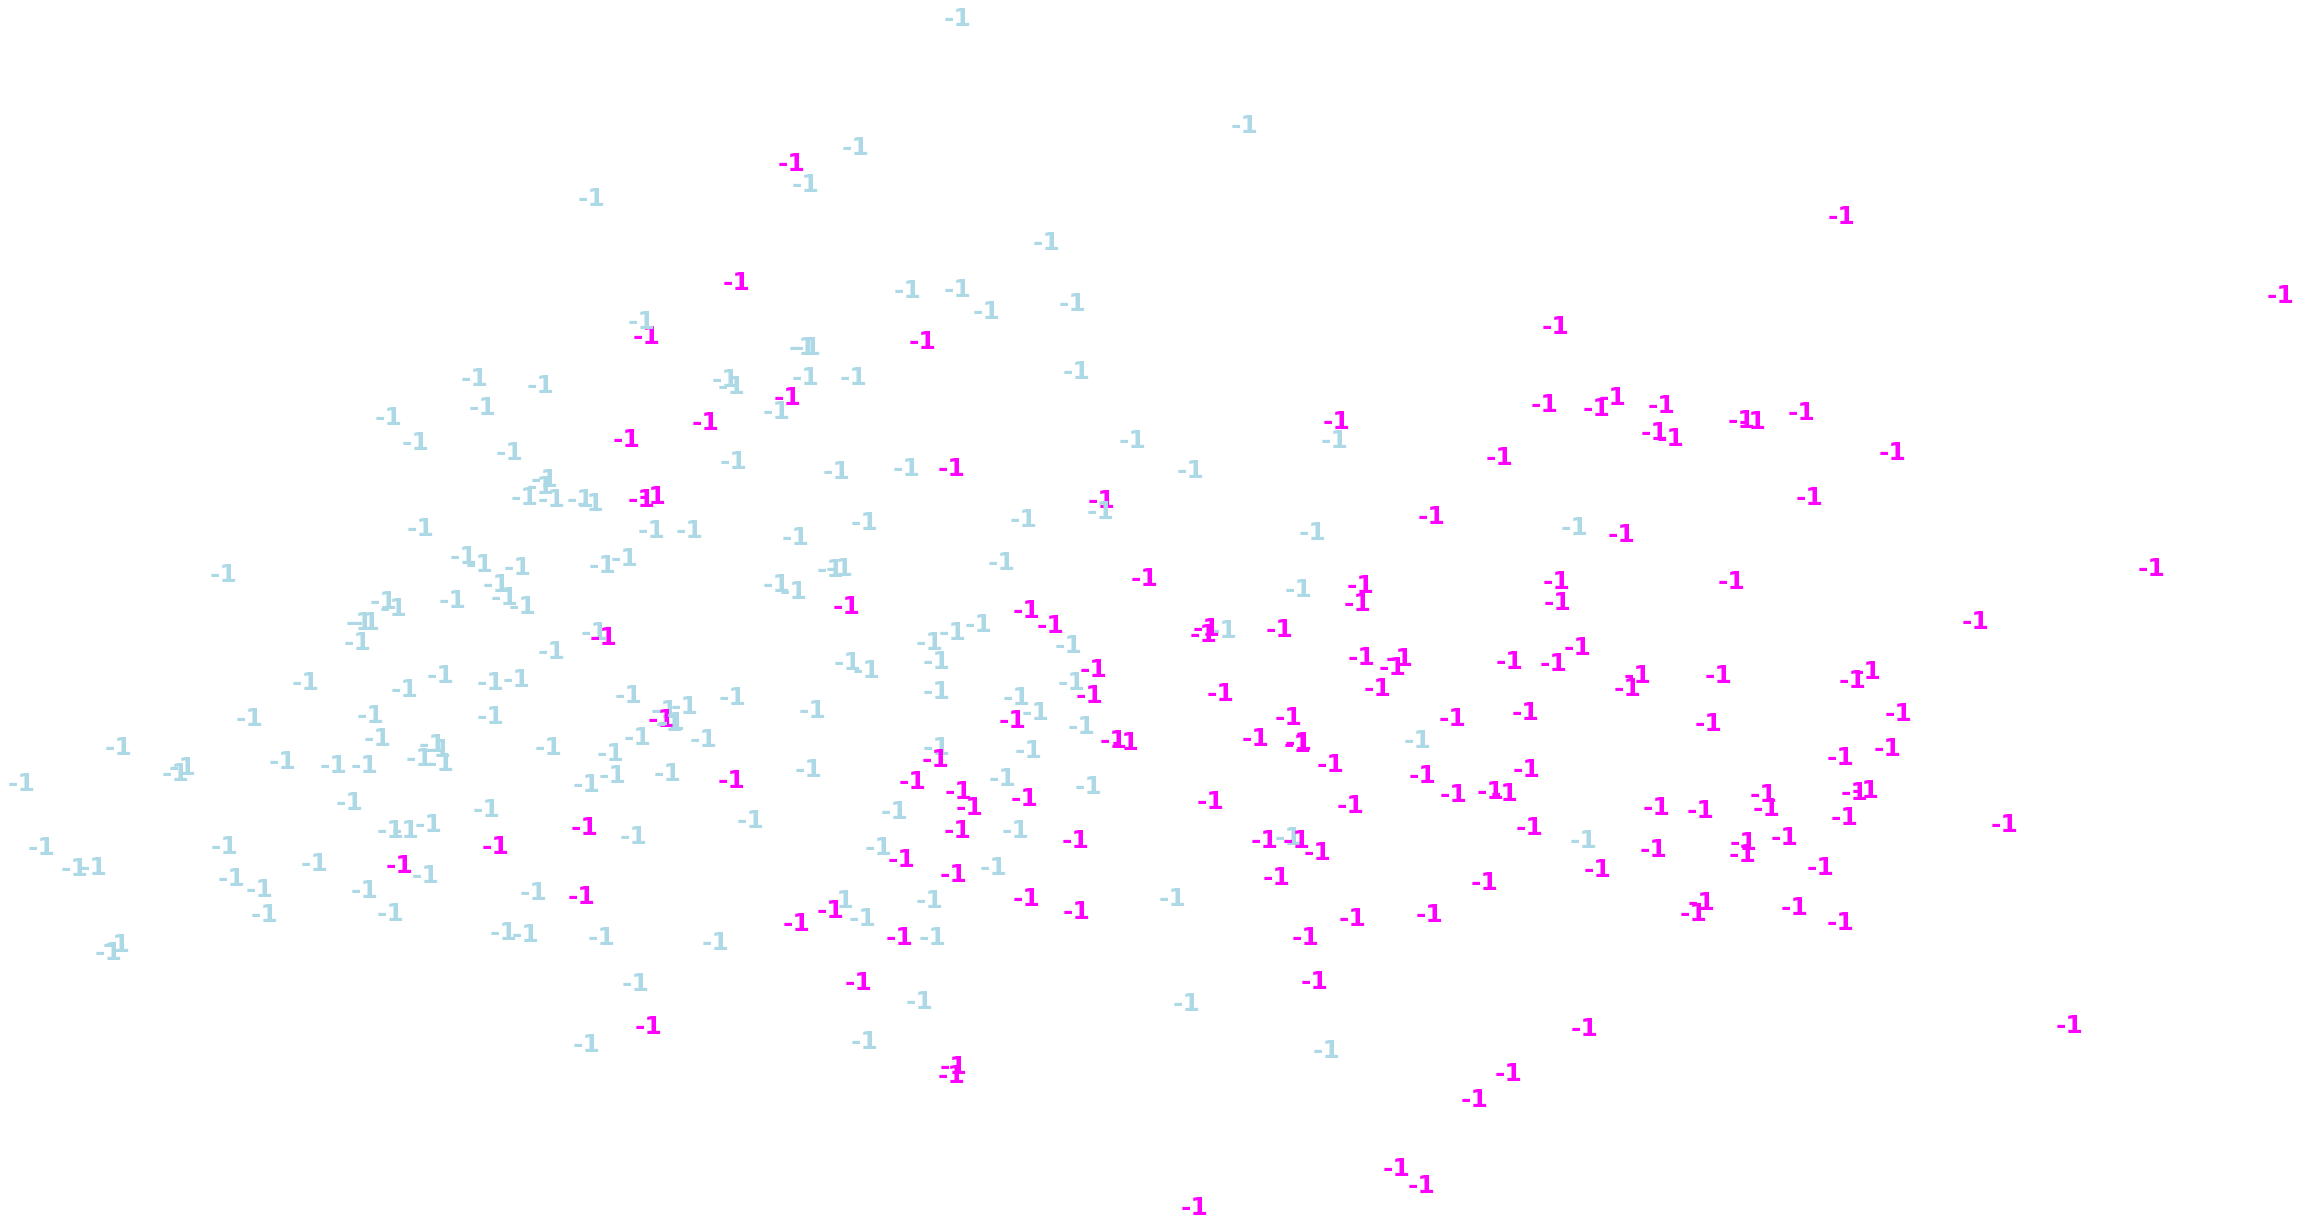

In [105]:
# eps=1, min_samples=1 was completed above min_sampes = 2-5 completed below
for i in range(2,6):
    print(f'min_samples: {i}')
    dbscan = DBSCAN(eps=1, min_samples=i, metric='euclidean')
    cluster = dbscan.fit_predict(X_std)
    pca = PCA(n_components=2).fit_transform(X_std)
    
    plt.figure(figsize=(5,3))
    colors = ('magenta', 'lightblue')

    for j in range(pca.shape[0]):
        plt.text(pca[j, 0], pca[j, 1], str(cluster[j]),
                 color=colors[y[j]],
                 fontdict={'weight': 'bold', 'size': 25})
    
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
    print('\n')

In [96]:
for i in range(1,10):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when min_samples={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when min_samples=1 is: 294
Number of clusters when min_samples=2 is: 9
Number of clusters when min_samples=3 is: 2
Number of clusters when min_samples=4 is: 1
Number of clusters when min_samples=5 is: 1
Number of clusters when min_samples=6 is: 1
Number of clusters when min_samples=7 is: 1
Number of clusters when min_samples=8 is: 1
Number of clusters when min_samples=9 is: 1


It's a little easier to see here than with the graphs, but as min_samples increase, clusters decrease

### 3. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of eps. What's the effect of increasing eps on the number of clusters DBSCAN identifies?

min_samples: 2


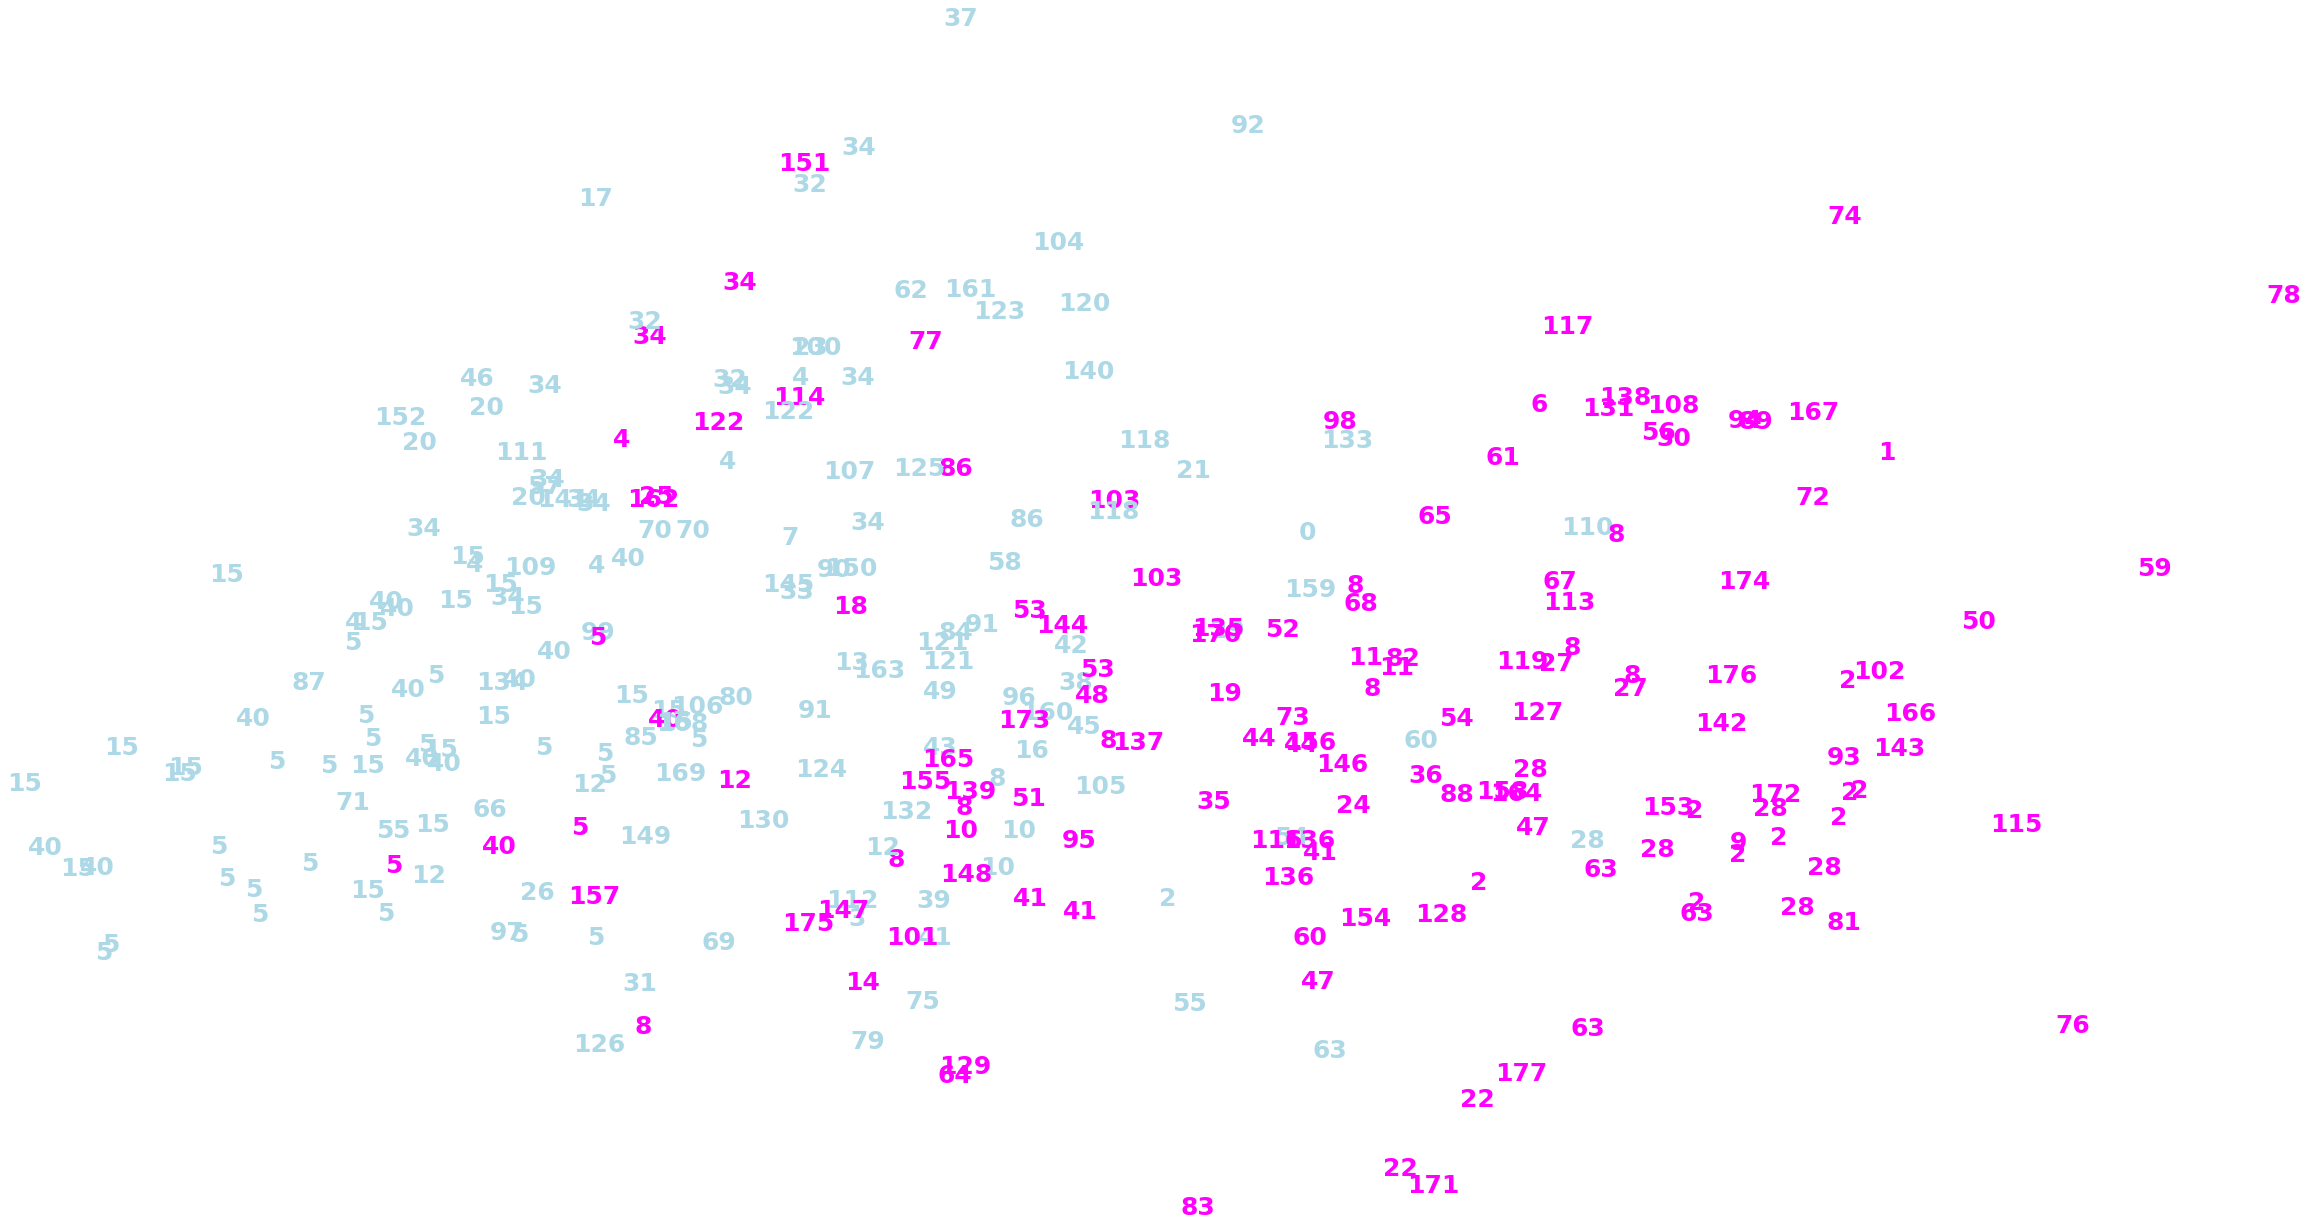



min_samples: 3


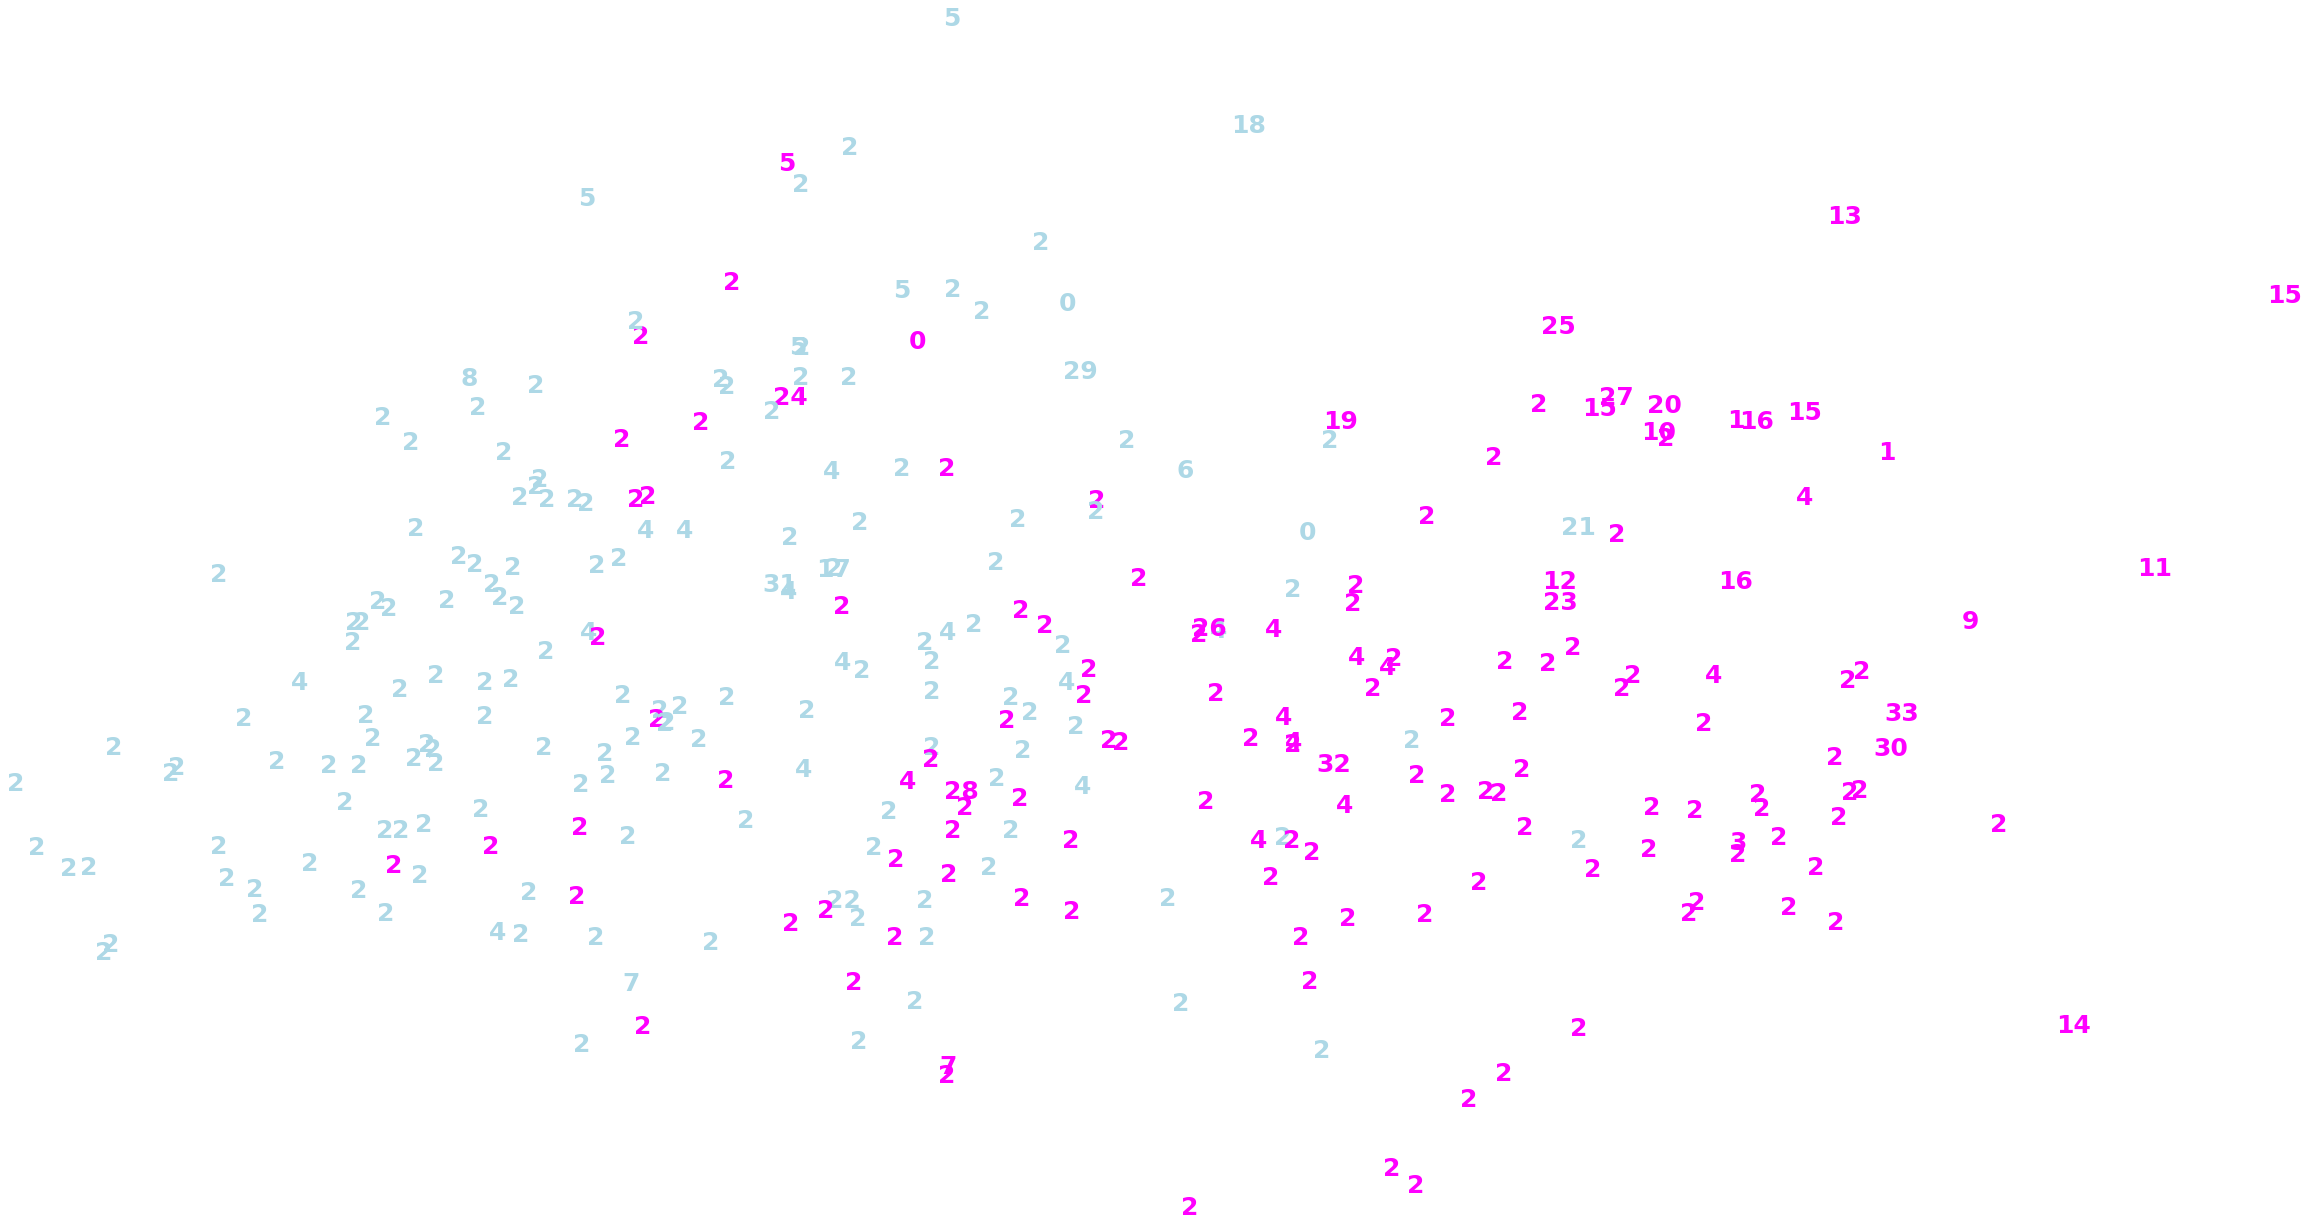



min_samples: 4


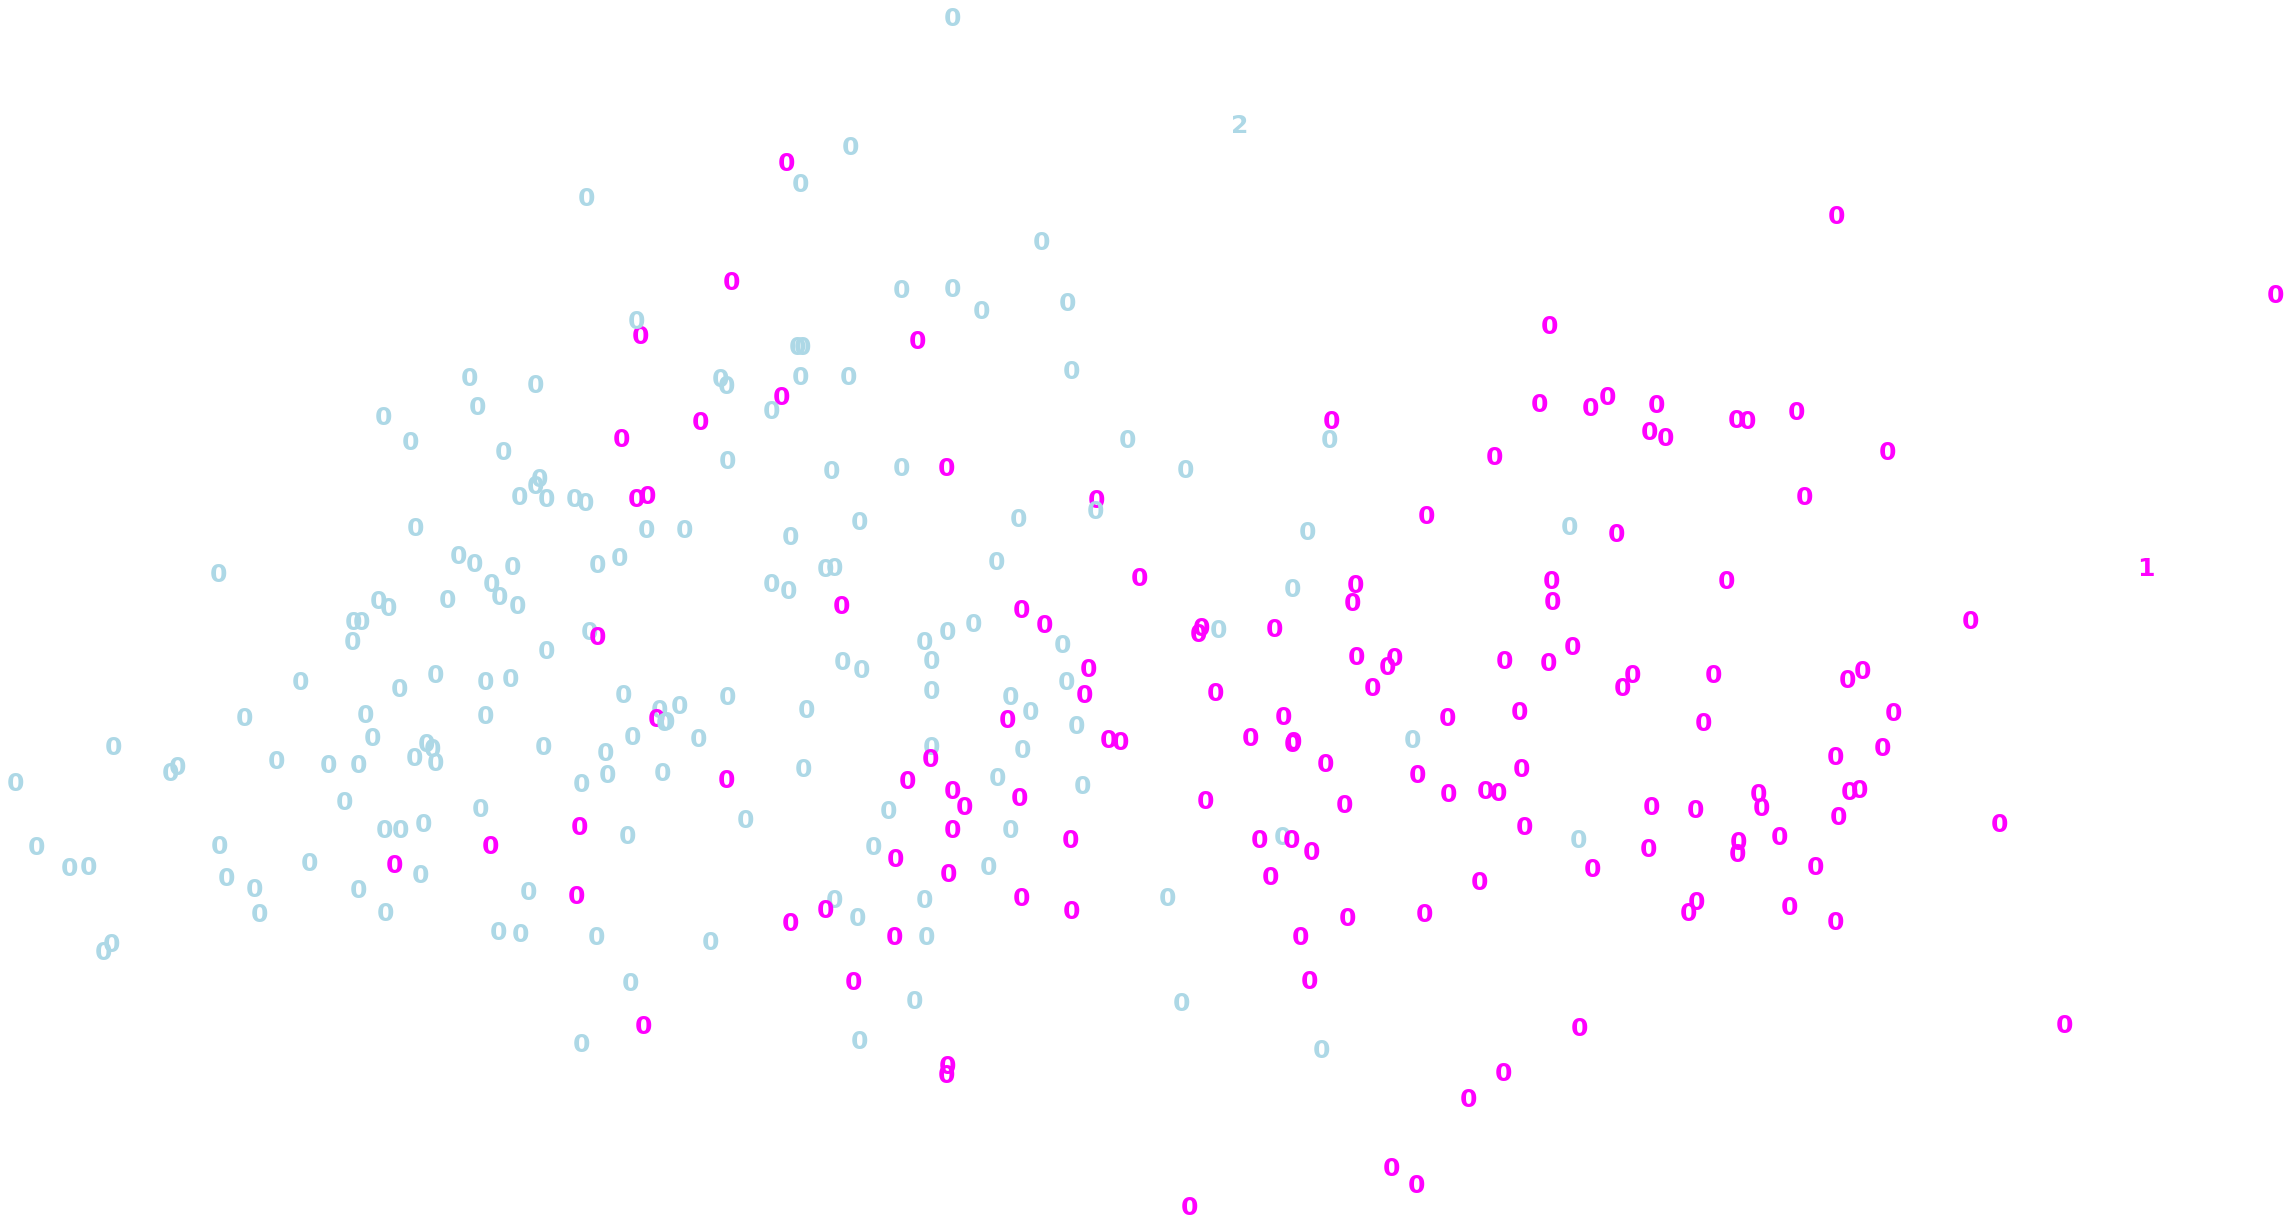



min_samples: 5


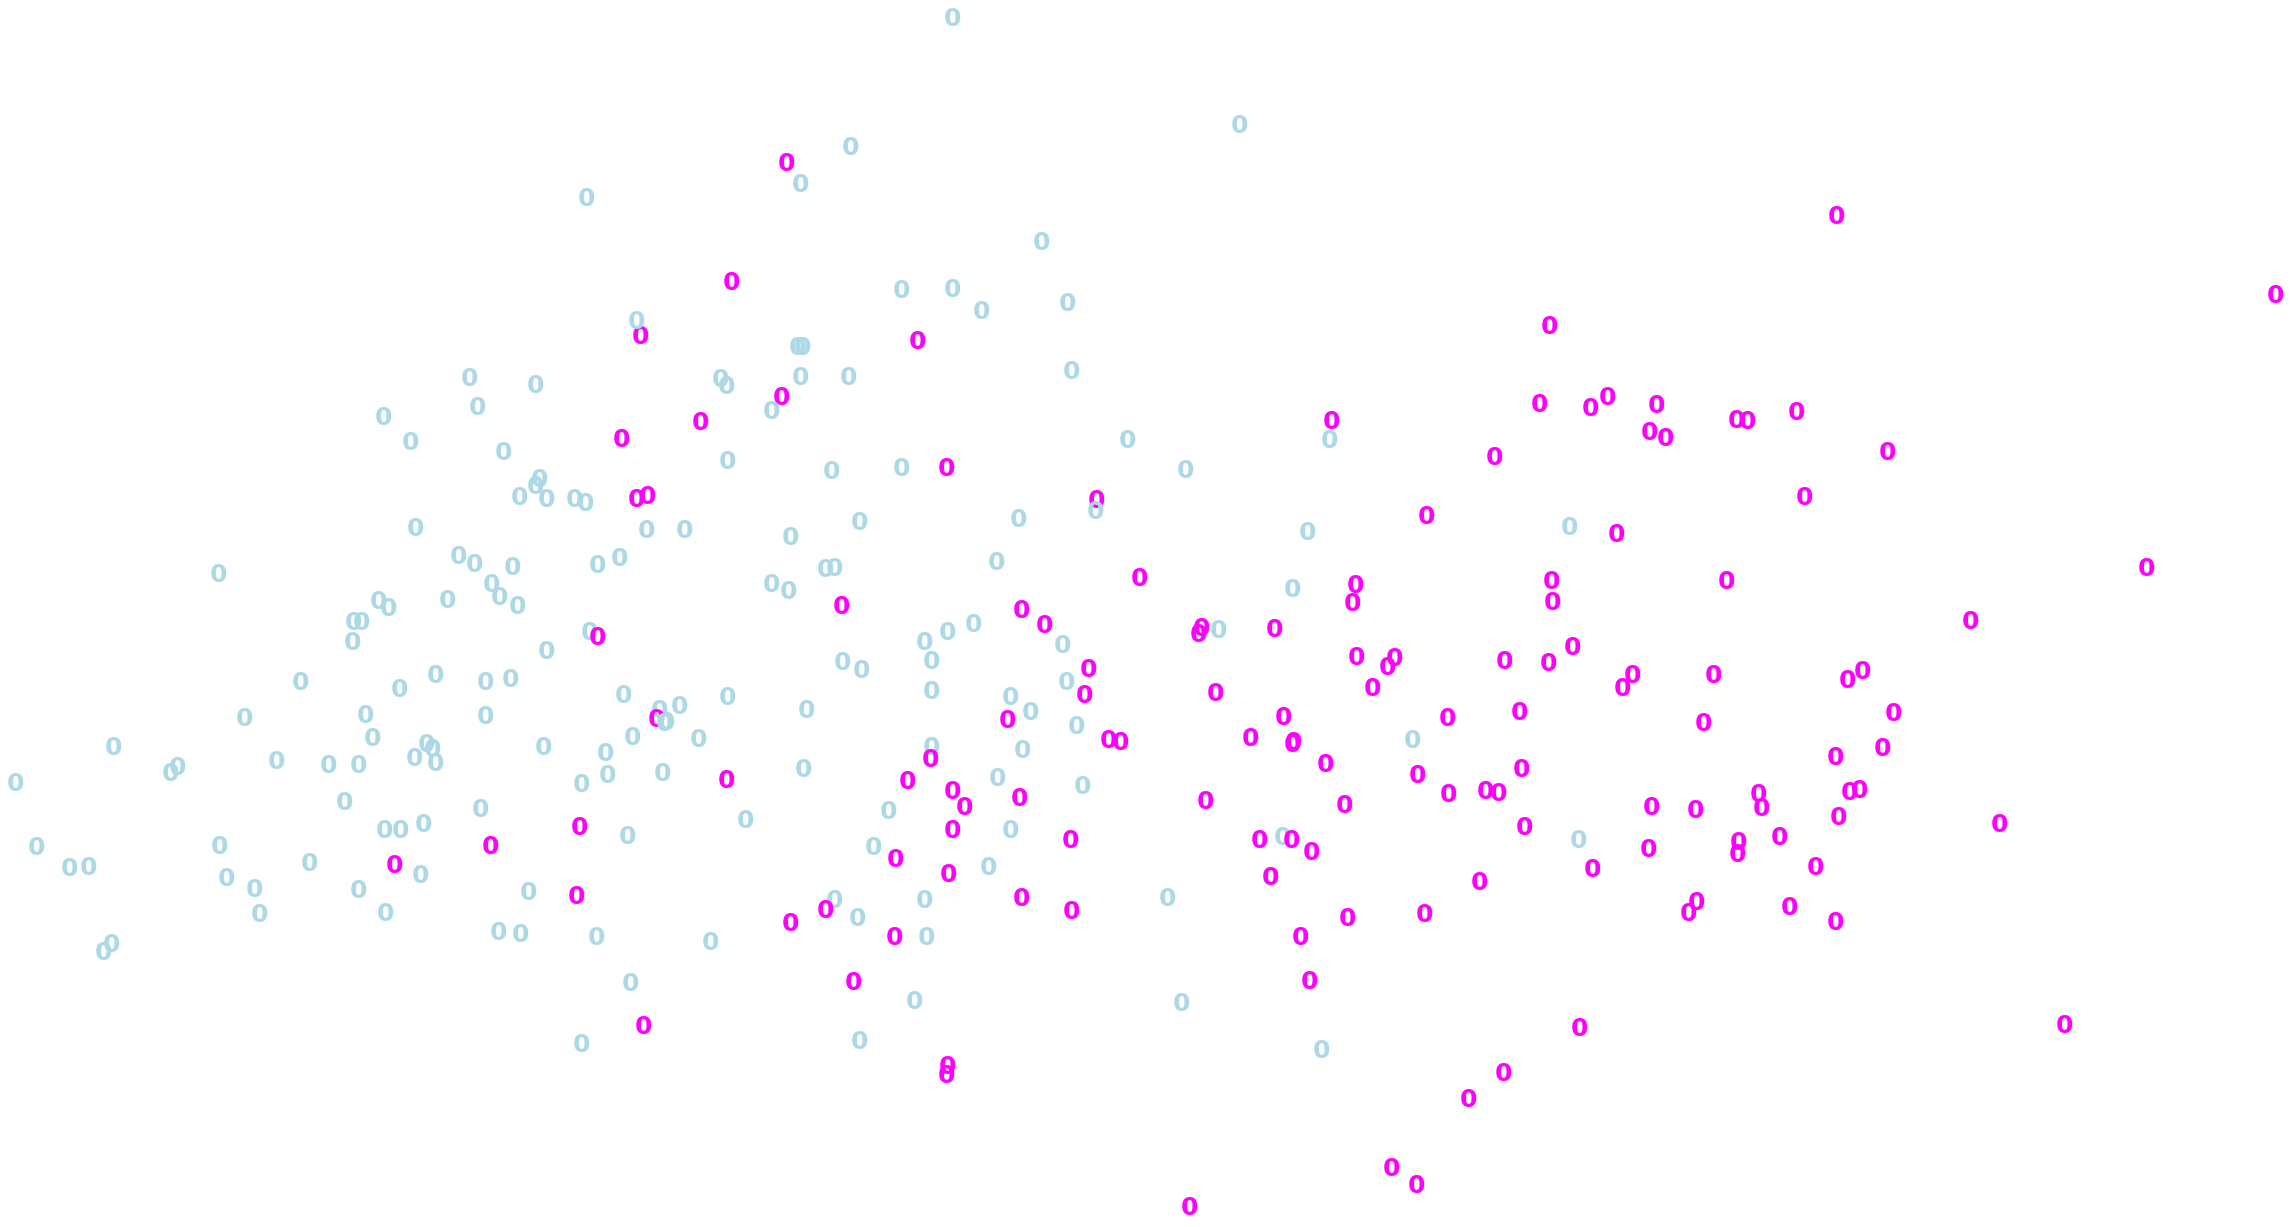

In [110]:
for i in range(2,6):
    print(f'min_samples: {i}')
    dbscan = DBSCAN(eps=i, min_samples=1, metric='euclidean')
    cluster = dbscan.fit_predict(X_std)
    pca = PCA(n_components=2).fit_transform(X_std)
    
    plt.figure(figsize=(5,3))
    colors = ('magenta', 'lightblue')

    for j in range(pca.shape[0]):
        plt.text(pca[j, 0], pca[j, 1], str(cluster[j]),
                 color=colors[y[j]],
                 fontdict={'weight': 'bold', 'size': 25})
    
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
    print('\n')

In [112]:
for i in range(1,10):
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when eps=1 is: 294
Number of clusters when eps=2 is: 178
Number of clusters when eps=3 is: 34
Number of clusters when eps=4 is: 3
Number of clusters when eps=5 is: 1
Number of clusters when eps=6 is: 1
Number of clusters when eps=7 is: 1
Number of clusters when eps=8 is: 1
Number of clusters when eps=9 is: 1


In [ ]:
When epsilon increases, clusters decrease at a different rate